<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
<center>
<h1>Decision Trees</h1> 
<h2>Students: Tales Marra and Gonzalo Quintana</h2>
</center>

In [8]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

## 1 - Exploratory data analysis

In [34]:
iris = load_iris()

In [45]:
X = iris['data']
y = iris['target']

## Distribution analysis

We study if there are missing values in the dataset.

In [32]:
X_df = pd.DataFrame(X)
X[X_df.isnull()]

array([], dtype=float64)

We conclude that there are no missing values.

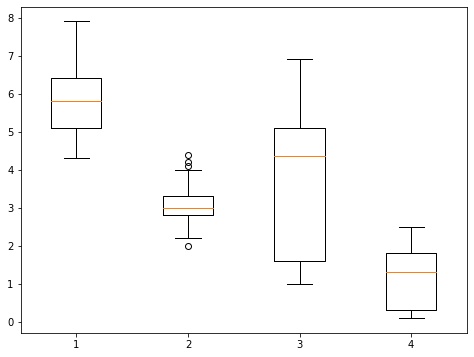

In [28]:
plt.figure(2, figsize=(8, 6))
plt.boxplot(X)
plt.show()

We can see that there are some outliers in the second variable.

## Visual data analysis

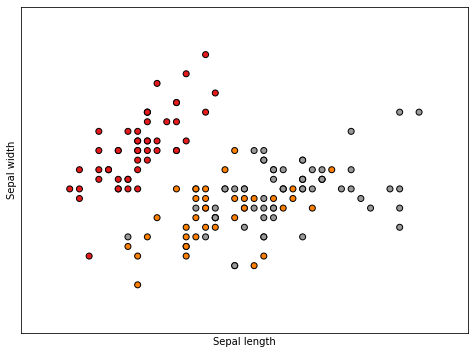

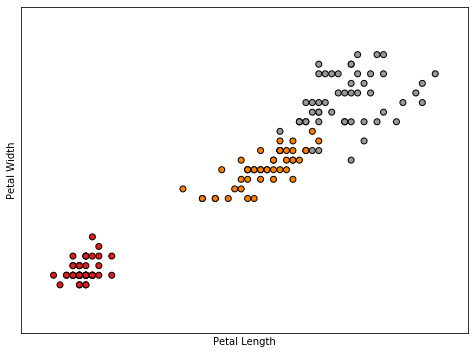

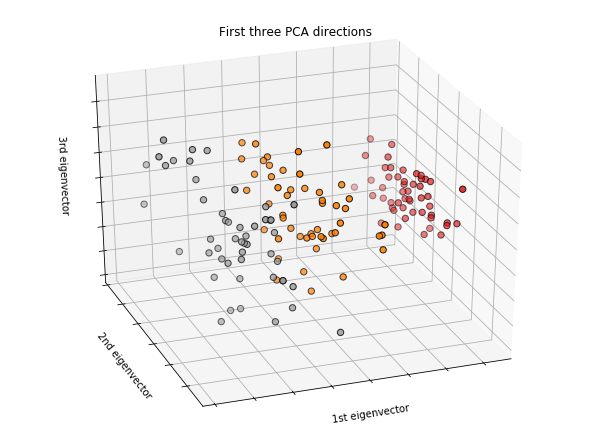

In [19]:
# We plot the first two variables

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# We plot the second two variables

plt.figure(2, figsize=(8, 6))
plt.clf()

x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eiboxplot(x, notch=False, sym='+', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)genvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

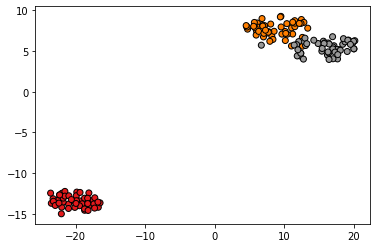

In [22]:
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

Some conclusions:

- We can see that there is one class that is very easy to separate. However, the two other classes are not linearly separable (but almost!). We can therefore expect good performances using not very deep decision trees (around 90 % accuracy).

- We need to be really careful when splitting data in order not to under (by taking too many examples of the problematic classes during tests) or overestimate (by taking too many examples of the easily separable class during tests) the classifier performance.


## 2 - Decision trees

We split data in a stratified fashion to avoid the problem mentioned above.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

###  1 - Decision trees with default parameters and different impurity measures

### Gini impurity

In [19]:
clfGini = tree.DecisionTreeClassifier("gini")
clfGini = clfGini.fit(X_train, y_train)

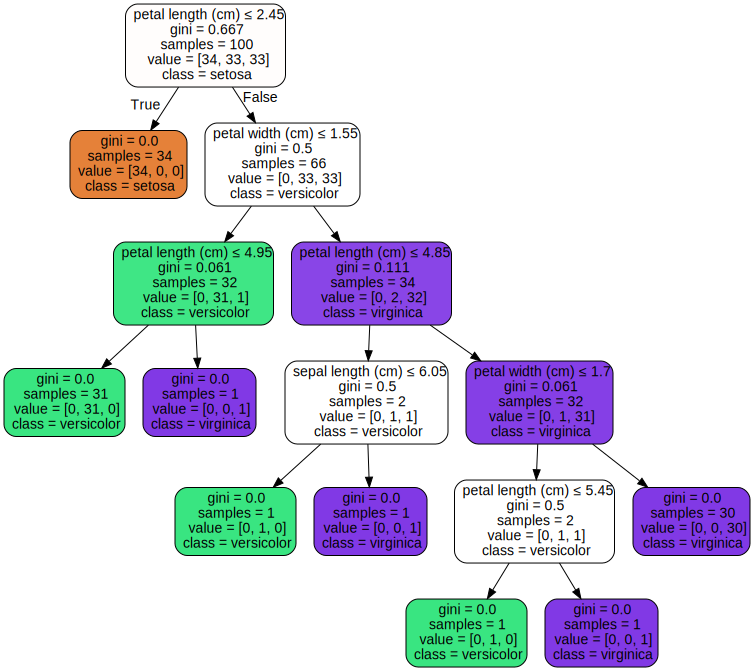

In [20]:
dot_data = tree.export_graphviz(clfGini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clfGini, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

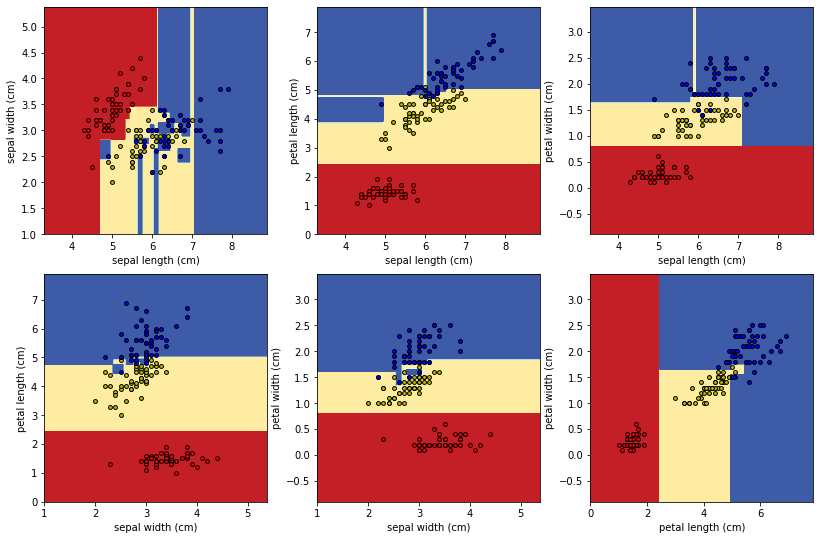

In [28]:
plot_step = 0.02
n_classes = 3
plot_colors = "ryb"

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier("gini")
    clf = clf.fit(X, y)

    # Plot the decision boundary
    fig = plt.figure(1, figsize=(12, 8))

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

### Entropy impurity

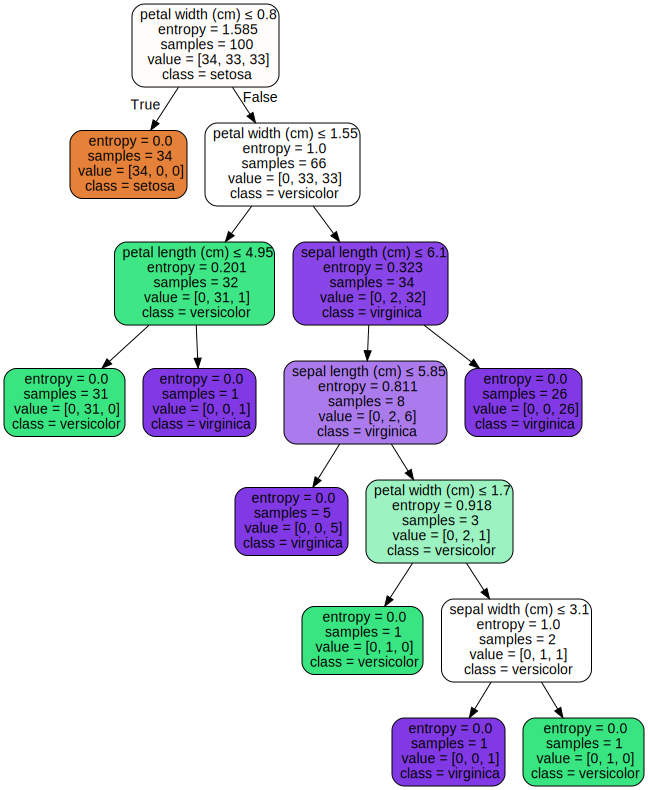

In [61]:
clfEntr = tree.DecisionTreeClassifier("entropy")
clfEntr = clfEntr.fit(X_train, y_train)

dot_data = tree.export_graphviz(clfEntr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clfEntr, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

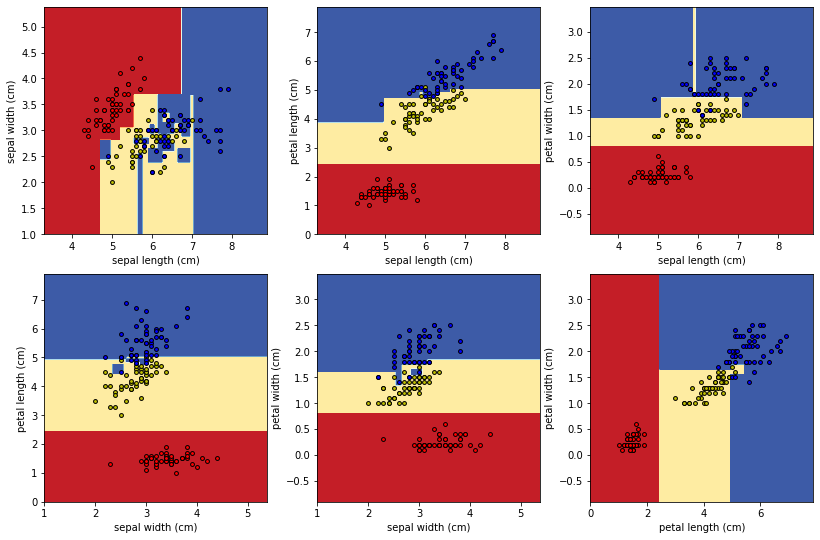

In [32]:
plot_step = 0.02
n_classes = 3
plot_colors = "ryb"

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier("entropy")
    clf = clf.fit(X, y)

    # Plot the decision boundary
    fig = plt.figure(1, figsize=(12, 8))

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

### 2 - Performance evaluation

We compare the trees performances with two baselines classifiers.

In [62]:
clfGini.score(X_test,y_test)

0.92

In [63]:
clfEntr.score(X_test,y_test)

0.96

In [68]:
clfBaseline = DummyClassifier(strategy='stratified')
clfBaseline.fit(X_train, y_train)
clfBaseline.score(X_test,y_test)

0.34

In [69]:
clfBaseline = DummyClassifier(strategy='most_frequent')
clfBaseline.fit(X_train, y_train)
clfBaseline.score(X_test,y_test)

0.32

We can see that the trees largely outperform the baseline classifiers.

### Cross validation

In [79]:
cv = 5
cv_results_gini = cross_validate(clfGini, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_gini['test_score'][i])
    print('Fit time: ', cv_results_gini['fit_time'][i])
    print('Score time: ', cv_results_gini['score_time'][i])

Cv 0
Test score:  0.9666666666666667
Fit time:  0.000995635986328125
Score time:  0.0005381107330322266
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0005462169647216797
Score time:  0.00040721893310546875
Cv 2
Test score:  0.9
Fit time:  0.0005357265472412109
Score time:  0.0002951622009277344
Cv 3
Test score:  0.9666666666666667
Fit time:  0.0008230209350585938
Score time:  0.00031185150146484375
Cv 4
Test score:  1.0
Fit time:  0.0005638599395751953
Score time:  0.0009224414825439453


In [80]:
cv = 5
cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_entropy['test_score'][i])
    print('Fit time: ', cv_results_entropy['fit_time'][i])
    print('Score time: ', cv_results_entropy['score_time'][i])

Cv 0
Test score:  0.9666666666666667
Fit time:  0.0006830692291259766
Score time:  0.0003376007080078125
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0004794597625732422
Score time:  0.00029540061950683594
Cv 2
Test score:  0.9
Fit time:  0.00042939186096191406
Score time:  0.0003497600555419922
Cv 3
Test score:  0.9666666666666667
Fit time:  0.0004410743713378906
Score time:  0.00027942657470703125
Cv 4
Test score:  1.0
Fit time:  0.0004520416259765625
Score time:  0.0002884864807128906


### 3 - Training parameters analysis

### Changing the minimum number of samples required to split an internal node

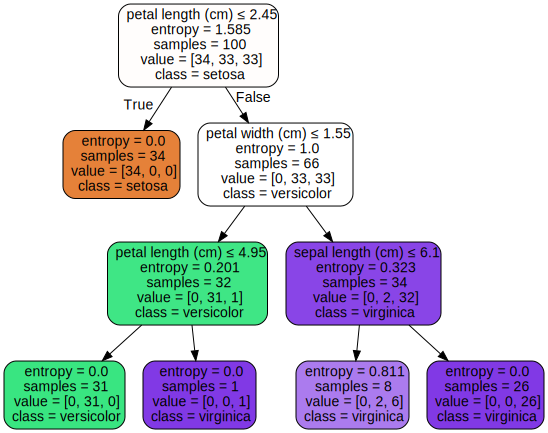

In [105]:
clfEntr = tree.DecisionTreeClassifier("entropy",min_samples_split=20)
clfEntr = clfEntr.fit(X_train, y_train)

dot_data = tree.export_graphviz(clfEntr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clfEntr, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can see that depth of the decision tree is significantly reduced.

In [88]:
cv = 5
cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_entropy['test_score'][i])
    print('Fit time: ', cv_results_entropy['fit_time'][i])
    print('Score time: ', cv_results_entropy['score_time'][i])

Cv 0
Test score:  0.9333333333333333
Fit time:  0.0008633136749267578
Score time:  0.0004215240478515625
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0007166862487792969
Score time:  0.0010111331939697266
Cv 2
Test score:  0.9
Fit time:  0.0005450248718261719
Score time:  0.00037169456481933594
Cv 3
Test score:  0.8666666666666667
Fit time:  0.0004515647888183594
Score time:  0.0003616809844970703
Cv 4
Test score:  1.0
Fit time:  0.0004744529724121094
Score time:  0.0002918243408203125


We can see that there's a big variance of the test score doing cross-validation (15 % difference).

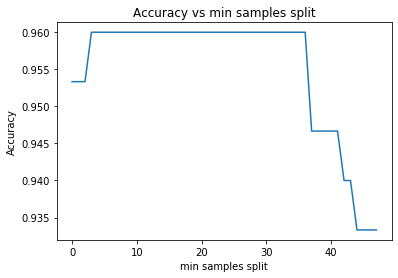

In [101]:
Nmax = 50
accuracies = []
for n in range(2,Nmax):
    clfEntr = tree.DecisionTreeClassifier("entropy",min_samples_split=n)
    cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
    accuracies.append(np.mean(cv_results_entropy['test_score']))
plt.plot(accuracies)
plt.title("Accuracy vs min samples split")
plt.xlabel("min samples split")
plt.ylabel("Accuracy")
plt.show()

We can see that as the criteria gets too strict, accuracy drops.

### Changing the minimum number of samples required to be at a leaf node

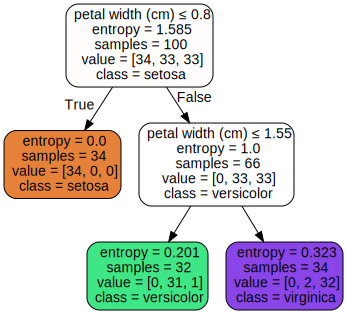

In [106]:
clfEntr = tree.DecisionTreeClassifier("entropy",min_samples_leaf=20)
clfEntr = clfEntr.fit(X_train, y_train)

dot_data = tree.export_graphviz(clfEntr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clfEntr, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can see that depth of this decision tree is even smaller than that of the previous one.

In [107]:
cv = 5
cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_entropy['test_score'][i])
    print('Fit time: ', cv_results_entropy['fit_time'][i])
    print('Score time: ', cv_results_entropy['score_time'][i])

Cv 0
Test score:  0.9333333333333333
Fit time:  0.0008342266082763672
Score time:  0.0004830360412597656
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0006225109100341797
Score time:  0.0003426074981689453
Cv 2
Test score:  0.9
Fit time:  0.0004849433898925781
Score time:  0.0003590583801269531
Cv 3
Test score:  0.8666666666666667
Fit time:  0.0004985332489013672
Score time:  0.0003266334533691406
Cv 4
Test score:  1.0
Fit time:  0.0004811286926269531
Score time:  0.00032258033752441406


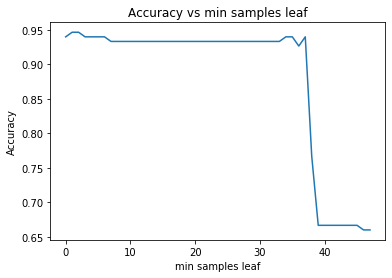

In [109]:
Nmax = 50
accuracies = []
for n in range(2,Nmax):
    clfEntr = tree.DecisionTreeClassifier("entropy",min_samples_leaf=n)
    cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
    accuracies.append(np.mean(cv_results_entropy['test_score']))
plt.plot(accuracies)
plt.title("Accuracy vs min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("Accuracy")
plt.show()

We can see that as the criteria gets too strict, accuracy drops.

## 4 - Method comparison

We compare the performances of other classification methods: KNN, LDA and random forests.

In [111]:
clfKNN = KNeighborsClassifier(n_neighbors=5)
clfKNN.fit(X_train,y_train)
clfKNN.score(X_test, y_test)

0.98

In [7]:
clfLDA = LDA()
clfLDA.fit(X_train,y_train)
clfLDA.score(X_test, y_test)

0.98

In [17]:
clfForest = RandomForestClassifier(n_estimators=1000, criterion='entropy')
clfForest.fit(X_train,y_train)
clfForest.score(X_test, y_test)

0.92

In [18]:
cv = 5
cv_results_forest = cross_validate(clfForest, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_forest['test_score'][i])
    print('Fit time: ', cv_results_forest['fit_time'][i])
    print('Score time: ', cv_results_forest['score_time'][i])

Cv 0
Test score:  0.9666666666666667
Fit time:  1.0942468643188477
Score time:  0.07277846336364746
Cv 1
Test score:  0.9666666666666667
Fit time:  1.0799572467803955
Score time:  0.07406759262084961
Cv 2
Test score:  0.9333333333333333
Fit time:  1.0720734596252441
Score time:  0.0744316577911377
Cv 3
Test score:  0.9666666666666667
Fit time:  1.1218359470367432
Score time:  0.07243895530700684
Cv 4
Test score:  1.0
Fit time:  1.0818867683410645
Score time:  0.07253909111022949


We can see that now the variance has been reduced (now we have only a 7 % variance, half of what we had with just one tree). And also, the mean bias is smaller.

## Error correction in dataset

By reading the documentation, we have identified two differences with the data used by Fischer :

According to https://archive.ics.uci.edu/ml/datasets/iris.

_"This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features. "_

In [43]:
print(X[35],y_names[y[35]])
print(X[38],y_names[y[38]])

[5.  3.2 1.2 0.2] setosa
[4.4 3.  1.3 0.2] setosa


We correct those two differences and we train again our trees.

In [44]:
iris = load_iris()

X = iris['data']
y = iris['target']
y_names = iris.target_names

X[35] = [4.9,3.1,1.5,0.2]
X[38] = [4.9,3.6,1.4,0.1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Gini impurity

In [47]:
clfGini = tree.DecisionTreeClassifier("gini")
clfGini = clfGini.fit(X_train, y_train)
clfGini.score(X_test, y_test)

0.98

In [48]:
cv = 5
cv_results_gini = cross_validate(clfGini, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_gini['test_score'][i])
    print('Fit time: ', cv_results_gini['fit_time'][i])
    print('Score time: ', cv_results_gini['score_time'][i])

Cv 0
Test score:  0.9666666666666667
Fit time:  0.0005199909210205078
Score time:  0.0003342628479003906
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0004279613494873047
Score time:  0.0002913475036621094
Cv 2
Test score:  0.9
Fit time:  0.00039839744567871094
Score time:  0.0002868175506591797
Cv 3
Test score:  0.9666666666666667
Fit time:  0.0004153251647949219
Score time:  0.0002880096435546875
Cv 4
Test score:  1.0
Fit time:  0.0004134178161621094
Score time:  0.000286102294921875


## Entropy impurity

In [51]:
clfEntr = tree.DecisionTreeClassifier("entropy")
clfEntr = clfEntr.fit(X_train, y_train)
clfEntr.score(X_test, y_test)

0.9

In [52]:
cv = 5
cv_results_entropy = cross_validate(clfEntr, X, y, cv=cv)
for i in range(cv):
    print('Cv {}'.format(i))
    print('Test score: ', cv_results_entropy['test_score'][i])
    print('Fit time: ', cv_results_entropy['fit_time'][i])
    print('Score time: ', cv_results_entropy['score_time'][i])

Cv 0
Test score:  0.9666666666666667
Fit time:  0.0008375644683837891
Score time:  0.00042247772216796875
Cv 1
Test score:  0.9666666666666667
Fit time:  0.0006022453308105469
Score time:  0.00030541419982910156
Cv 2
Test score:  0.9
Fit time:  0.0004627704620361328
Score time:  0.00031304359436035156
Cv 3
Test score:  0.9333333333333333
Fit time:  0.0004448890686035156
Score time:  0.0002872943878173828
Cv 4
Test score:  1.0
Fit time:  0.0004565715789794922
Score time:  0.0002906322479248047
